# Supervised Learning

## Predicting Website Traffic

## Reading and Plotting News Article Data

In [1]:
#reading in new dataset

import pandas as pd
news = pd.read_csv('OnlineNewsPopularity.csv')

In [2]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


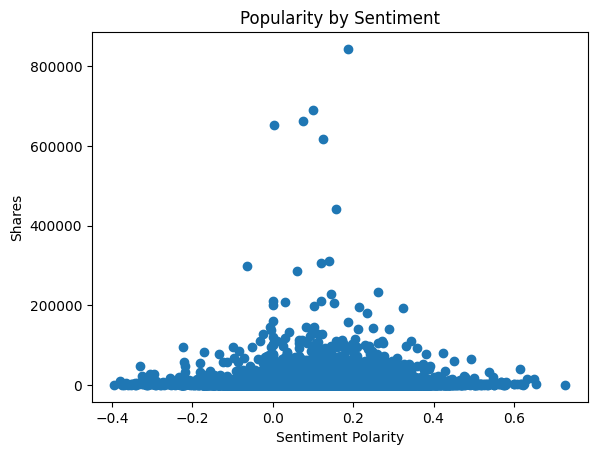

In [3]:
#plotting a scatter plot of global_sentiment_polarity vs shares from the dataset

import matplotlib.pyplot as plt
plt.scatter(news[' global_sentiment_polarity'], news[' shares'])
plt.title('Popularity by Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Shares')
plt.show()

## Using Linear Regression as a Prediction Method

In [4]:
#performing lineatr regression on global_sentiment_polarity vs shares

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(news[[' global_sentiment_polarity']], news[' shares'])
print(reg.coef_)
print(reg.intercept_)

[499.34840588]
3335.803290209575


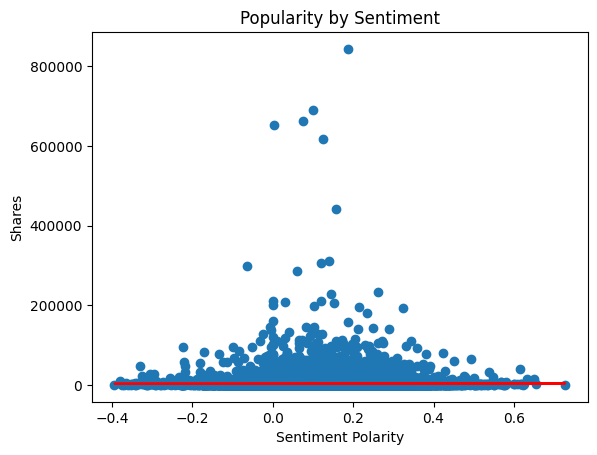

In [5]:
#Plotting the regression line against the scatter plot of global_sentiment_polarity vs shares

plt.scatter(news[' global_sentiment_polarity'], news[' shares'])
plt.plot(news[' global_sentiment_polarity'], reg.predict(news[[' global_sentiment_polarity']]), color='red')
plt.title('Popularity by Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Shares')
plt.show()


## k-Nearest Neighbors

## Implementing k-NN

In [6]:
k = 15
newsentiment = 0.5

#from sklearn.neighbors import KNeighborsRegressor
#reg = KNeighborsRegressor(n_neighbors=k)
#reg.fit(news[[' global_sentiment_polarity']], news[' shares'])


allsentiment = news[' global_sentiment_polarity'].tolist()
allshares = news[' shares'].tolist()

In [7]:
#Calculate the distance between every article in our dataset and the hypo new article

distances = [abs(allsentiment[i] - newsentiment) for i in range(len(allsentiment))]



In [8]:
#sorting the distance list

import numpy as np
idx = np.argsort(distances)

print(idx[:k])

[30230 22546  7284 13035 29598 19361 36029 30670 25556  6744 26473  7211
  9200 15198 31496]


In [9]:
nearbyshares = [allshares[i] for i in idx[:k]]
print(np.mean(nearbyshares))

7344.466666666666


## Performing k-NN with Python's sklearn

In [10]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=k)
reg.fit(news[[' global_sentiment_polarity']], news[' shares'])

KNeighborsRegressor(n_neighbors=15)

In [11]:
#Displaying the prediction our classifier makes

print(reg.predict([[newsentiment]]))

[7344.46666667]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [12]:
#creating a decision tree model

from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(news[[' global_sentiment_polarity']], news[' shares'])

#displaying the prediction

print(reg.predict([[newsentiment]]))

[3978.70776621]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [13]:
#creating a random forest model

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(news[[' global_sentiment_polarity']], news[' shares'])

#displaying the prediction

print(reg.predict([[newsentiment]]))

[4085.74460836]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [14]:
#creating a neural network

from sklearn.neural_network import MLPRegressor
reg = MLPRegressor()
reg.fit(news[[' global_sentiment_polarity']], news[' shares'])

#displaying the prediction

print(reg.predict([[newsentiment]]))

[3999.19391577]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


## Measuring Prediction Accuracy

In [15]:
#Calculating the MAE for prediction accuracy

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(news[' shares'], reg.predict(news[[' global_sentiment_polarity']])))

3199.4136881629147


In [16]:
#Splitting our dataset into train and test

from sklearn.model_selection import train_test_split
trainingx, testx,trainingy,testy = train_test_split(news[' abs_title_sentiment_polarity'],news[' shares'], random_state=1 )

In [17]:
print(len(trainingx))
print(len(trainingy))
print(len(testx))
print(len(testy))

29733
29733
9911
9911


In [18]:
#Using a random forest on the training data

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(trainingx.values.reshape(-1,1), trainingy)

#creating the predicted variable

predicted = reg.predict(testx.values.reshape(-1,1))

#calculating the MAE

print(mean_absolute_error(testy, predicted))

3193.129829638201


## Working with Multivariate Models

In [19]:
#creating our features variable from the following cols global_sentiment_polarity n_unique_tokens n_non_stop_words

x = news[[' global_sentiment_polarity', ' n_unique_tokens', ' n_non_stop_words']]
y = news[' shares']

In [20]:
#creating training and test split from the data

from sklearn.model_selection import train_test_split
trainingx, testx,trainingy,testy = train_test_split(x,y, random_state=1 )

In [21]:
#Creating a random forest from the training data

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state=1)
reg.fit(trainingx, trainingy)

#creating the predicted variable

predicted = reg.predict(testx)

#calculating the MAE

print(mean_absolute_error(testy, predicted))

3474.431322312199


## Using classification Instead of Regression

In [23]:
#creating a variable that allows us to do classification

themedian = np.median(news[' shares'])

news["abovemedianshares"]  = [1 if x > themedian else 0 for x in news[' shares']]

In [24]:
#using knnclassifier on features of global_sentiment_polarity n_unique_tokens n_non_stop_words and the target of abovemedianshares

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)


In [25]:
#splitting the dataset into training and test data

from sklearn.model_selection import train_test_split
trainingx, testx,trainingy,testy = train_test_split(x,news["abovemedianshares"], random_state=1 )

In [26]:
#fitting the classifier on the training data

knn.fit(trainingx, trainingy)

KNeighborsClassifier(n_neighbors=15)

In [27]:
#creating the predicted variable

predicted = knn.predict(testx)

In [28]:
#Creating a confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(testy, predicted))

[[2703 2280]
 [2370 2558]]


In [29]:
#Calculating the recall and precision

from sklearn.metrics import recall_score, precision_score
print(recall_score(testy, predicted))
print(precision_score(testy, predicted))

0.5190746753246753
0.5287308805291443
